# Tugas Besar - IF2220 - Probabilitas dan Statistika
## Penarikan Kesimpulan dan Pengujian Hipotesis

### Soal Tugas

Diberikan sebuah data water_potability.csv yang dapat diakses pada utas berikut: Dataset
Tugas Besar IF2220. water_potability.csv merupakan data metrik kualitas air yang
mengandung 11 kolom sebagai berikut:
1. id
2. pH
3. Hardness
4. Solids
5. Chloramines
6. Sulfate
7. Conductivity
8. OrganicCarbon
9. Trihalomethanes
10. Turbidity
11. Potability

Kolom 2-10 adalah kolom atribut (non-target), sedangkan kolom 11 adalah kolom target.
Anda diminta untuk melakukan analisis statistika sebagai berikut:
(No. 3,5,6)

In [37]:
# Markdown dan display untuk menulis di notebook
from IPython.display import Markdown, display
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
import scipy.stats as st

### 1. Menulis deskripsi statistika (Descriptive Statistics) 
Untuk semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis.

In [38]:
# Import data
nama_kolom = ['id','pH','Hardness','Solids','Chloramines','Sulfate','Conductivity','OrganicCarbon','Trihalomethanes','Turbidity','Potability']
water_potability = pd.read_csv("water_potability.csv", names = nama_kolom)
water_potability.head()

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [39]:
# Calculating descriptive statistics
wp_stats = water_potability.drop(['id'], axis=1)

# for Range and IQR
wp_stats_Describe = water_potability.describe()
wp_stats_Describe = wp_stats_Describe.drop(['id'], axis=1)


print("Mean: ")
print(wp_stats.mean())
print()

print("Median:")
print(wp_stats.median())
print()

print("Mode:")
print(wp_stats.mode())
print()

print("Standar Deviasi:")
print(wp_stats.std())
print()

print("Varians:")
print(wp_stats.var())
print()

print("Range:")
for column in wp_stats_Describe:
    print(f"{column:16} ", wp_stats_Describe[column]["max"] - wp_stats_Describe[column]["min"])
print()

print("Minimum:")
print(wp_stats.min())
print()

print("Maksimum:")
print(wp_stats.max())
print()

print("IQR:")
for column in wp_stats_Describe:
    print(f"{column:16} ", wp_stats_Describe[column]["75%"] - wp_stats_Describe[column]["25%"])
print("\n")

print("Skewness:")
print(wp_stats.skew())
print("\n\n")

print("Kurtosis:")
print(wp_stats.kurtosis())
print()

Mean: 
pH                     7.087193
Hardness             195.969209
Solids             21904.673439
Chloramines            7.134322
Sulfate              333.211376
Conductivity         426.476708
OrganicCarbon         14.357940
Trihalomethanes       66.400717
Turbidity              3.969497
Potability             0.402985
dtype: float64

Median:
pH                     7.029490
Hardness             197.203525
Solids             20926.882155
Chloramines            7.142014
Sulfate              332.214113
Conductivity         423.438372
OrganicCarbon         14.323286
Trihalomethanes       66.482041
Turbidity              3.967374
Potability             0.000000
dtype: float64

Mode:
             pH    Hardness        Solids  Chloramines     Sulfate  \
0      0.227499   73.492234    320.942611     1.390871  129.000000   
1      0.989912   77.459586   1198.943699     1.920271  180.206746   
2      1.431782   81.710895   1351.906979     2.397985  182.397370   
3      1.757037   94.091307

### 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak 
Normality test dilakukan dengan menggunakan library `scipy.stats.normaltest()` untuk masing-masing kolom, dengan alHardnessa = 0.05.

In [40]:
for i in nama_kolom:
    if(i != "id" and i != "Kelas"):
        k2, pvalue = st.normaltest(water_potability[i])
        # bandingkan pvalue dengan alHardnessa = 0.05
        if (pvalue < 0.05):
            print("Kolom '" + i + "' tidak terdistribusi normal\n")
        else:
            print("Kolom '" + i + "' terdistribusi normal\n")

Kolom 'pH' tidak terdistribusi normal

Kolom 'Hardness' tidak terdistribusi normal

Kolom 'Solids' tidak terdistribusi normal

Kolom 'Chloramines' tidak terdistribusi normal

Kolom 'Sulfate' tidak terdistribusi normal

Kolom 'Conductivity' tidak terdistribusi normal

Kolom 'OrganicCarbon' terdistribusi normal

Kolom 'Trihalomethanes' terdistribusi normal

Kolom 'Turbidity' terdistribusi normal

Kolom 'Potability' tidak terdistribusi normal



### 5. Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing 
Boxplot juga ditampilkan untuk kolom/bagian yang bersesuaian.
- Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
rata-rata kedua bagian tersebut sama?
- Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom.
Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?
- Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?
- Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada,
proporsi nilai yang sama di bagian akhir Turbidity ?
- Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

### 6. Test korelasi
Tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test. 
Nilai koefisien korelasi berada pada rentang antara -1 dan 1, dengan rincian sebagai berikut:
- $-1$ menunjukkan korelasi $X$ dan $Y$ negatif yang kuat. setiap kali $X$ meningkat, $Y$ berkurang.
- $0$ berarti tidak ada hubungan antara $X$ dan $Y$.
- $1$ menunjukkan korelasi $X$ dan $Y$ positif yang kuat. setiap kali $X$ meningkat, $Y$ meningkat.

Skala korelasi sebagai acuan:
- 0 : **Tidak ada** korelasi antara dua variabel
- 0,01 – 0,25: Korelasi sangat **lemah**
- 0,25 – 0,5: Korelasi **cukup**
- 0,5 – 0,75: Korelasi  **kuat**
- 0,75 – 0,99: Korelasi  **sangat kuat**
- 1: Korelasi **sempurna**

In [41]:
# fungsi untuk menuliskan hasil korelasi
def corr_result(rho, x, y):
    out = "Dari hasil $\\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom "+ x +" dan "+ y
    if (rho == 0): out += " **tidak** berkorelasi"
    else:
        if (rho > 0): out += " berkorelasi **positif** "
        else: out += " berkorelasi **negatif** "

        out += " dan memiliki tingkat korelasi "
        if (rho > 0 and rho <= 0.25) or (rho < 0 and rho >= -0.25): out += "**sangat lemah**"
        elif (rho > 0.25 and rho <= 0.5) or (rho < -0.25 and rho >= -0.5): out += "**cukup**"
        elif (rho > 0.5 and rho <= 0.75) or (rho < -0.5 and rho >= -0.75): out += "**kuat**"
        elif (rho > 0.75 and rho < 1) or (rho < -0.75 and rho > -1): out += "**sangat kuat**"
        else: out += "**sempurna**"
    display(Markdown(out))

#### pH

Hasil korelasi kolom pH (non-target) dengan kolom Potability (target)

$\rho_{pH,Potability} = 0.01547509440843348$

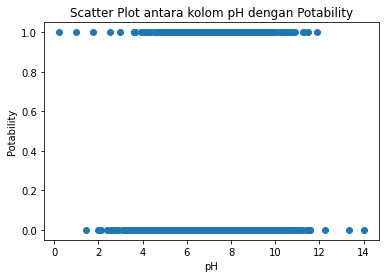

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom pH dan Potability berkorelasi **positif**  dan memiliki tingkat korelasi **sangat lemah**

In [42]:
display(Markdown("#### pH"))
display(Markdown("Hasil korelasi kolom pH (non-target) dengan kolom Potability (target)"))
rho = water_potability['pH'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{pH,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom pH dengan Potability")
plt.scatter(x=water_potability['pH'],y=water_potability['Potability'])
plt.xlabel("pH")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "pH", "Potability")

#### Hardness

Hasil korelasi kolom Hardness (non-target) dengan kolom Potability (target)

$\rho_{Hardness,Potability} = -0.0014631528959479344$

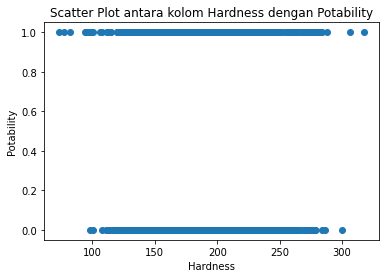

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Hardness dan Potability berkorelasi **negatif**  dan memiliki tingkat korelasi **sangat lemah**

In [43]:
display(Markdown("#### Hardness"))
display(Markdown("Hasil korelasi kolom Hardness (non-target) dengan kolom Potability (target)"))
rho = water_potability['Hardness'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{Hardness,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Hardness dengan Potability")
plt.scatter(x=water_potability['Hardness'],y=water_potability['Potability'])
plt.xlabel("Hardness")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Hardness", "Potability")

#### Solids

Hasil korelasi kolom Solids (non-target) dengan kolom Potability (target)

$\rho_{Solids,Potability} = 0.03897657818173466$

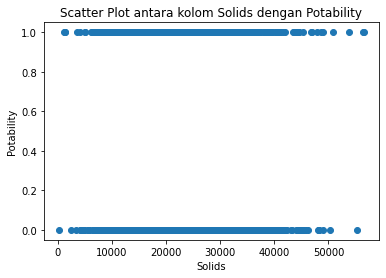

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Solids dan Potability berkorelasi **positif**  dan memiliki tingkat korelasi **sangat lemah**

In [44]:
display(Markdown("#### Solids"))
display(Markdown("Hasil korelasi kolom Solids (non-target) dengan kolom Potability (target)"))
rho = water_potability['Solids'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{Solids,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Solids dengan Potability")
plt.scatter(x=water_potability['Solids'],y=water_potability['Potability'])
plt.xlabel("Solids")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Solids", "Potability")

#### Chloramines

Hasil korelasi kolom Chloramines (non-target) dengan kolom Potability (target)

$\rho_{Chloramines,Potability} = 0.02077892184052409$

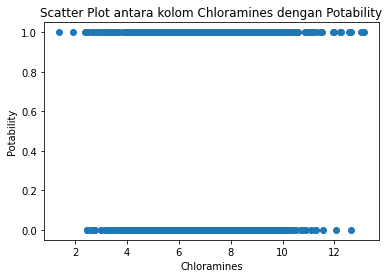

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Chloramines dan Potability berkorelasi **positif**  dan memiliki tingkat korelasi **sangat lemah**

In [45]:
display(Markdown("#### Chloramines"))
display(Markdown("Hasil korelasi kolom Chloramines (non-target) dengan kolom Potability (target)"))
rho = water_potability['Chloramines'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{Chloramines,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Chloramines dengan Potability")
plt.scatter(x=water_potability['Chloramines'],y=water_potability['Potability'])
plt.xlabel("Chloramines")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Chloramines", "Potability")

#### Sulfate

Hasil korelasi kolom Sulfate (non-target) dengan kolom Potability (target)

$\rho_{Sulfate,Potability} = -0.015703164419273778$

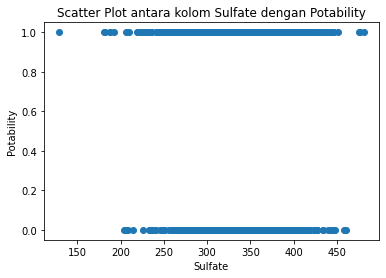

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Sulfate dan Potability berkorelasi **negatif**  dan memiliki tingkat korelasi **sangat lemah**

In [46]:
display(Markdown("#### Sulfate"))
display(Markdown("Hasil korelasi kolom Sulfate (non-target) dengan kolom Potability (target)"))
rho = water_potability['Sulfate'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{Sulfate,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Sulfate dengan Potability")
plt.scatter(x=water_potability['Sulfate'],y=water_potability['Potability'])
plt.xlabel("Sulfate")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Sulfate", "Potability")

#### Conductivity

Hasil korelasi kolom Conductivity (non-target) dengan kolom Potability (target)

$\rho_{Conductivity,Potability} = -0.016257120111377067$

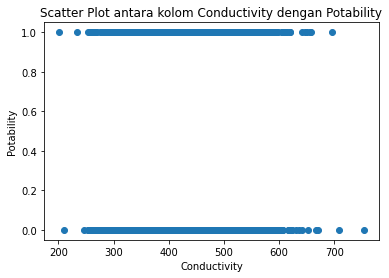

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Conductivity dan Potability berkorelasi **negatif**  dan memiliki tingkat korelasi **sangat lemah**

In [47]:
display(Markdown("#### Conductivity"))
display(Markdown("Hasil korelasi kolom Conductivity (non-target) dengan kolom Potability (target)"))
rho = water_potability['Conductivity'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{Conductivity,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Conductivity dengan Potability")
plt.scatter(x=water_potability['Conductivity'],y=water_potability['Potability'])
plt.xlabel("Conductivity")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Conductivity", "Potability")

#### OrganicCarbon

Hasil korelasi kolom OrganicCarbon (non-target) dengan kolom Potability (target)

$\rho_{OrganicCarbon,Potability} = -0.015488461910747259$

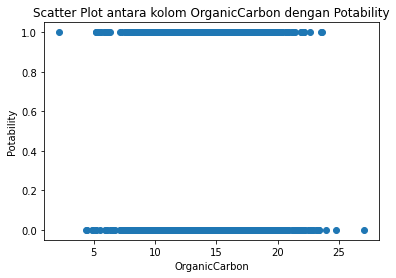

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom OrganicCarbon dan Potability berkorelasi **negatif**  dan memiliki tingkat korelasi **sangat lemah**

In [48]:
display(Markdown("#### OrganicCarbon"))
display(Markdown("Hasil korelasi kolom OrganicCarbon (non-target) dengan kolom Potability (target)"))
rho = water_potability['OrganicCarbon'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{OrganicCarbon,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom OrganicCarbon dengan Potability")
plt.scatter(x=water_potability['OrganicCarbon'],y=water_potability['Potability'])
plt.xlabel("OrganicCarbon")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "OrganicCarbon", "Potability")

#### Trihalomethanes

Hasil korelasi kolom Trihalomethanes (non-target) dengan kolom Potability (target)

$\rho_{Trihalomethanes,Potability} = 0.009236711064712997$

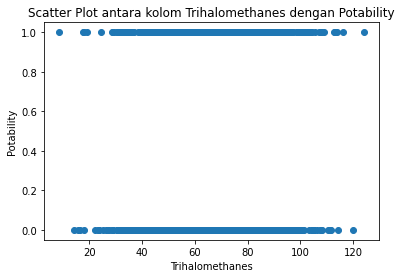

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Trihalomethanes dan Potability berkorelasi **positif**  dan memiliki tingkat korelasi **sangat lemah**

In [49]:
display(Markdown("#### Trihalomethanes"))
display(Markdown("Hasil korelasi kolom Trihalomethanes (non-target) dengan kolom Potability (target)"))
rho = water_potability['Trihalomethanes'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{Trihalomethanes,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Trihalomethanes dengan Potability")
plt.scatter(x=water_potability['Trihalomethanes'],y=water_potability['Potability'])
plt.xlabel("Trihalomethanes")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Trihalomethanes", "Potability")

#### Turbidity

Hasil korelasi kolom Turbidity (non-target) dengan kolom Potability (target)

$\rho_{Turbidity,Potability} = 0.022331042640622665$

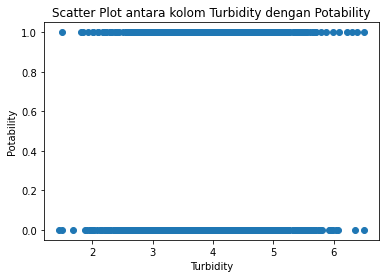

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Turbidity dan Potability berkorelasi **positif**  dan memiliki tingkat korelasi **sangat lemah**

In [50]:
display(Markdown("#### Turbidity"))
display(Markdown("Hasil korelasi kolom Turbidity (non-target) dengan kolom Potability (target)"))
rho = water_potability['Turbidity'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{Turbidity,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Turbidity dengan Potability")
plt.scatter(x=water_potability['Turbidity'],y=water_potability['Potability'])
plt.xlabel("Turbidity")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Turbidity", "Potability")